**Linear Regression Model with MNIST Dataset**

1.Importing important libraries for the model

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.Linear Regression Model

In [0]:
class Linear_Regression:
   
   #  'train' method takes argument as Learning Rate(alpha), Regularisation Constant(lam), and No.of Iterations(n_iter).
   #  All of these values have been initialised by a default value, but can be changed when required.
   #  J_hist and noi(number of iterations) keeps track of cost along with iteration. 
     
  def train(self,alpha=0.05,lam=0.01,n_iter=6000):
    self.alpha = alpha
    self.n_iter = n_iter
    self.lam = lam 
    self.J_hist = []
    self.noi = []
   
  #  'cost' method takes no arguments and returns the mean squared error of our hypothesis.
  
  def cost(self):
    h = self.X@self.theta
    return (1/(2*self.m))*np.sum((h-self.y)**2) + (self.lam/(self.m*2))*np.sum(self.theta[1:,0]**2)
  
  #  'fit' takes X_train,y_train as arguments, applies gradient descent algorithm to fit our parameters theta and returns theta.
  
  def fit(self,X,y):
    self.m = X.shape[0]
    self.n = X.shape[1]
    self.theta = np.zeros((self.n + 1,1))
    
    #  Normalization
    self.X = self.normalize(X)
    self.y = y[:,np.newaxis]

    # Gradient Descent Algorithm.
    for i in range(self.n_iter):
         # Parameter update
         theta1  = self.theta
         theta1[0,0] = 0
         self.theta = self.theta - (self.alpha/self.m) * ((self.X.T @ (self.X @ self.theta - self.y)) + self.lam*theta1)
         self.J_hist.append(self.cost())
         self.noi.append(i)
         if(i==0):
           print("Initial Cost:",self.cost())
         if(i==self.n_iter-1):
           print("Final Cost:",self.cost())  
  
  # 'score' takes X,y as arguement and returns the score of our prediction.
  def score(self,X,y):
    X = self.normalize(X)
    y = y[:,np.newaxis]
    y_pre = X@self.theta
    return  1 - (((y - y_pre)**2).sum() / ((y - y.mean())**2).sum())
  
  # Calculates accuracy for our prediction with test example.
  def accuracy(self,y_test,y_pred):
    m = len(y_test)
    sum1 =0
    for i in range(m):
     if(y_test[i]==y_pred[i]):
      sum1+=1
    return (sum1/m)*100  
    
  # plots the learning curve; cost function vs no.of iterations.
  def plot_learn(self):
    plt.plot(self.noi,self.J_hist)
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost Function")
    plt.title("Const Function vs Iteration")

  # splits the dataset into training set and test set based on the input split fraction.
  def test_train_split(self,X,y,size):
        m_test = int(X.shape[0]*size)
        X_test = X[0:m_test,:]
        y_test = y[0:m_test]
        X_train = X[m_test:,:]
        y_train = y[m_test:]
        return X_train,X_test,y_train,y_test   
 
  # predicting value of target feature using the trained model.
  def predict(self,X):
    m = X.shape[0]
    X = self.normalize(X)
    y_pred = X@self.theta
    return y_pred.flatten()

  # Normalises X
  def normalize(self,X):
    m = X.shape[0]
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i]))/(np.std(X[:,i]) + np.exp(-9))
    X = np.hstack((np.ones((m, 1)), X))
    return X

  #  returns the parameter theta(weight) of the model.
  def get_params(self):
      return self.theta  


3.Reading the Training Dataset using pandas.

In [0]:
df = pd.read_csv('sample_data/mnist_train_small.csv',header = None)

In [0]:
X_train = np.array(df.iloc[:,1:785])
y_train = np.array(df.iloc[:,0])

4.Using 'a' as our model; trainig and fiiting our model

In [0]:
a = Linear_Regression()
a.train()
a.fit(X_train,y_train)

Initial Cost: 7.786117071115743
Final Cost: 2.0159286320279928


5.Learning Curve plot

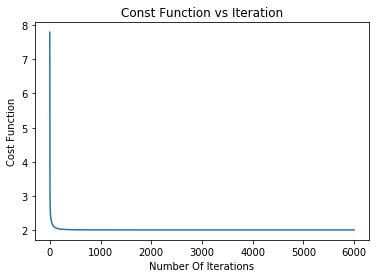

In [0]:
a.plot_learn()

6.Reading the Test Dataset

In [0]:
df1 = pd.read_csv('sample_data/mnist_test.csv',header = None)
X_test = np.array(df1.iloc[:,1:785])
y_test = np.array(df1.iloc[:,0])

7.Post Processing

In [0]:
# new y_pred takes arguments y_pred and threshold; changes y_pred based on the value of threshold.
def new_y_pred(y_pred,threshold):
    j = threshold
    for i in range(y_pred.shape[0]):
        x = y_pred[i]
        if(x<0+j):
          y_pred[i] = 0
        if(x>=0+j and x<1+j):
          y_pred[i] = 1
        if(x>=1+j and x<2+j):
          y_pred[i] = 2
        if(x>=2+j and x<3+j):
          y_pred[i] = 3
        if(x>=3+j and x<4+j):
          y_pred[i] = 4
        if(x>=4+j and x<5+j):
          y_pred[i] = 5
        if(x<=5+j and x>6+j):
          y_pred[i] = 6
        if(x>=6+j and x<7+j):
          y_pred[i] = 7
        if(x>=7+j and x<8+j):
          y_pred[i] = 8
        if(x>=8+j):
          y_pred[i] = 9
    y_pred.astype('int64')      
    return y_pred    

# threshold_cal takes no argument; finds the threshold which would give maximum training accuracy, and returns new y_pred using that threshold.
def threshold_cal():
    thre = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    my_acc = []
    for threshold in thre:
        y_pred = a.predict(X_train)
        y_pred = new_y_pred(y_pred,threshold)
        my_acc.append(a.accuracy(y_train,y_pred))
    max1_acc = max(my_acc)
    print("Max. Training Accuracy:",max1_acc)
    index1 = my_acc.index(max1_acc)
    thre_value = thre[index1]
    y_pred = a.predict(X_test)
    y_pred = new_y_pred(y_pred,thre_value)
    return y_pred   

In [0]:
y_pred = threshold_cal()
print("Test Accuracy:",a.accuracy(y_test,y_pred))

Max. Training Accuracy: 22.994999999999997
Test Accuracy: 18.310000000000002


8.Using sk-learn model for comparision.

In [0]:
from sklearn.linear_model import LinearRegression
sk_learn = LinearRegression()
sk_learn.fit(X_train,y_train)
sk_acc = []
thre = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# finds the threshold with maximum training accuracy and using that threshold on y_pred_sk, finds the test accuracy.
for threshold in thre:
  y_pred_sk = sk_learn.predict(X_train)
  y_pred_sk = new_y_pred(y_pred_sk,threshold)
  sk_acc.append(a.accuracy(y_train,y_pred_sk))
max2_acc = max(sk_acc)
index2 = sk_acc.index(max2_acc)
thre_value = thre[index2]
y_pred_sk = sk_learn.predict(X_test)
y_pred_sk = new_y_pred(y_pred_sk,thre_value)
print("sk learn Test Accuracy:",a.accuracy(y_test,y_pred_sk))

sk learn Test Accuracy: 18.75
